In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [4]:
data = load_breast_cancer()

In [24]:
X = pd.DataFrame(data['data'])
y = pd.DataFrame(data['target'])

In [25]:
X.shape

(569, 30)

In [26]:
y.shape

(569, 1)

In [21]:
data

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [13]:
svm = OneClassSVM()

In [14]:
svm.fit(X,y)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [16]:
plt.figure()
plt.svm()
plt.show

AttributeError: module 'matplotlib.pyplot' has no attribute 'svm'

In [17]:


iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

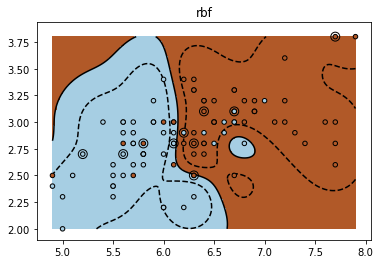

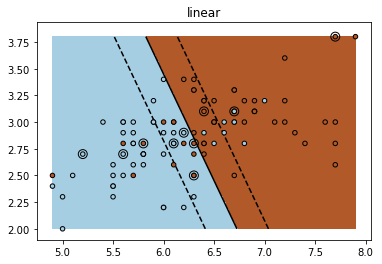

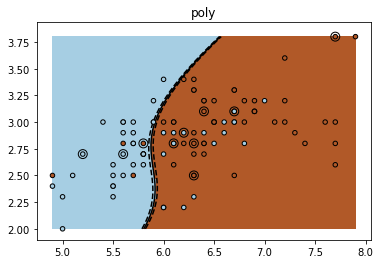

In [20]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [22]:
X.shape

(100, 2)

In [23]:
y.shape

(100,)

In [125]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.semi_supervised import label_propagation

In [137]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
dataset = make_blobs(centers=[[0, 0], [0, 2]], cluster_std=[0.4,0.6],**blobs_params)

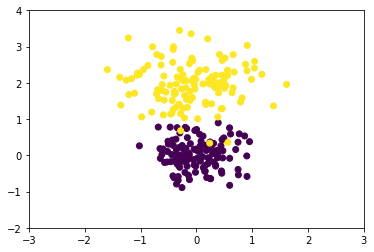

In [138]:
data = dataset[0];label = dataset[1]
x = data[:,0];y = data[:,1]
plt.scatter(x, y, c=label)
plt.xlim(-3,3)
plt.ylim(-2,4)
plt.show()


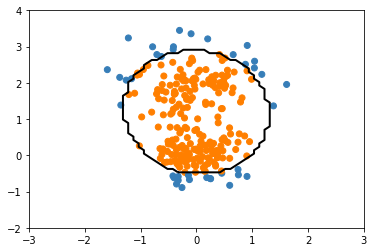

In [139]:
algorithm = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)
label_pred = algorithm.fit(data).predict(data)
colors = np.array(['#377eb8', '#ff7f00'])
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,color=colors[np.int16((label_pred+1)//2)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()

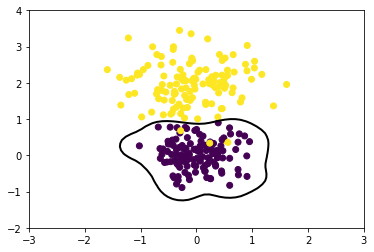

In [140]:
algorithm = svm.SVC(kernel='rbf', gamma=10)
algorithm.fit(data, label)
colors = np.array(['#377eb8', '#ff7f00'])
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = algorithm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=label)
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()

In [141]:
rng = np.random.RandomState(0)
label_30 = np.copy(label)
label_30[rng.rand(len(label)) < 0.3] = -1
label_50 = np.copy(label)
label_50[rng.rand(len(label)) < 0.5] = -1
label_70 = np.copy(label)
label_70[rng.rand(len(label)) < 0.7] = -1

In [142]:
ls30 = label_propagation.LabelSpreading().fit(data, label_30)
ls50 = label_propagation.LabelSpreading().fit(data, label_50)
ls70 = label_propagation.LabelSpreading().fit(data, label_70)

ls100 = label_propagation.LabelSpreading().fit(data, label)


C:\Anaconda\lib\site-packages\sklearn\utils\graph.py:115: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, np.int)


C:\Anaconda\lib\site-packages\sklearn\semi_supervised\label_propagation.py:198: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


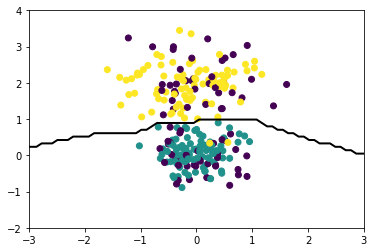

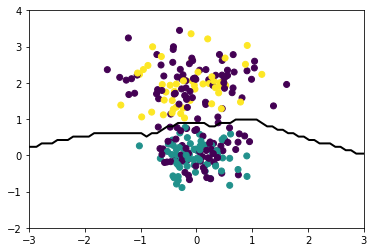

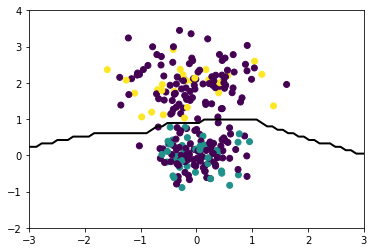

In [143]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls30.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=label_30)
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=label_50)
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls70.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=label_70)
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()


In [144]:
label_30

array([ 1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0, -1, -1, -1,
        0,  0,  1,  1,  0,  0,  1, -1,  0, -1,  0,  1,  1, -1,  1,  1,  0,
       -1,  1,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  1,  0,
        0,  0, -1, -1, -1,  0, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,  1,
       -1,  1, -1,  0,  0,  0,  1, -1,  1, -1, -1,  1, -1,  1, -1,  0, -1,
        1,  1, -1,  0,  0,  0, -1,  0,  1,  0,  1, -1,  0,  0,  1,  0,  0,
        1,  1,  1,  0,  1,  0,  0, -1,  1,  1, -1,  0,  0, -1, -1,  1,  1,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  0, -1,  0,  1,  0, -1,  0, -1,
        1, -1,  1,  0,  1,  1, -1,  1,  1,  1,  1,  0,  0, -1,  1,  0, -1,
        0, -1, -1, -1,  1, -1,  1,  0,  0, -1, -1,  1,  1, -1,  0,  1,  1,
        1,  1,  0,  1, -1, -1,  0,  1,  1, -1, -1, -1,  0,  0,  1,  0, -1,
       -1, -1,  0,  1,  1,  1,  0, -1,  0, -1, -1,  1,  1,  0,  0,  1,  0,
        1, -1,  1, -1,  1